In [29]:
from sklearn.cluster import KMeans  #algorithm in sklearn library to do k-means clustering

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [30]:
df = pd.read_csv('datasets\ccgeneral.csv')

In [31]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12
6,C10007,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12
7,C10008,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12
8,C10009,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12
9,C10010,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12


In [4]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [5]:
df.drop(['CUST_ID', 'BALANCE_FREQUENCY','ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES','PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],axis=1, inplace=True)

In [6]:
df.columns

Index(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS'], dtype='object')

In [7]:
df.groupby('CREDIT_LIMIT').mean()

,BALANCE,PURCHASES,CASH_ADVANCE,PAYMENTS
CREDIT_LIMIT,,,,
50.0,795.497557,0.000000,5676.779668,7570.207782
150.0,145.709691,45.800000,94.702715,447.481832
200.0,74.283448,81.813333,105.804515,179.029307
300.0,139.323285,405.390000,96.264069,623.123741
400.0,86.985321,644.826667,0.000000,664.577504
450.0,240.213688,1051.273333,0.000000,1303.019604
500.0,210.062288,294.757355,226.237879,531.004055
600.0,412.262609,444.240476,115.129038,819.762465
650.0,242.530010,3520.000000,0.000000,3814.912997


In [8]:
df['CREDIT_LIMIT'].min(),df['CREDIT_LIMIT'].max()

(50.0, 30000.0)

In [9]:

bins=[0,7500,15000,22500,30000]
group_names=[1,2,3,4]
df['Customer_Size']=pd.cut(df['CREDIT_LIMIT'],bins,labels=group_names)
df.head()


,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,Customer_Size
0,40.900749,95.40,0.000000,1000.0,201.802084,1
1,3202.467416,0.00,6442.945483,7000.0,4103.032597,1
2,2495.148862,773.17,0.000000,7500.0,622.066742,1
3,1666.670542,1499.00,205.788017,7500.0,0.000000,1
4,817.714335,16.00,0.000000,1200.0,678.334763,1


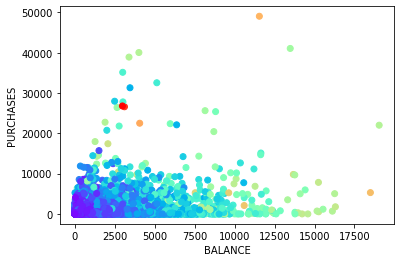

In [10]:
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['CREDIT_LIMIT'], cmap='rainbow')

Text(0, 0.5, 'PAYMENTS')

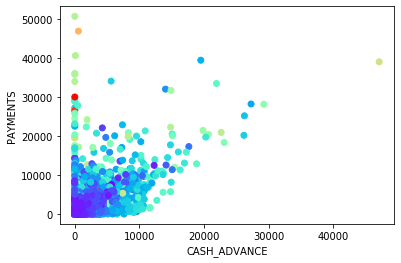

In [11]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['CREDIT_LIMIT'], cmap='rainbow')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

In [12]:
X = df.drop(['CREDIT_LIMIT', 'PAYMENTS'], axis=1)

In [13]:
y = df['CREDIT_LIMIT'].copy()
y.head()

0    1000.0
1    7000.0
2    7500.0
3    7500.0
4    1200.0
Name: CREDIT_LIMIT, dtype: float64

In [14]:
X.isnull().sum()

BALANCE          0
PURCHASES        0
CASH_ADVANCE     0
Customer_Size    1
dtype: int64

In [15]:
X['Customer_Size'] = X['Customer_Size'].fillna(value = 1)

In [16]:
kmeans = KMeans(n_clusters=4)


In [17]:
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [18]:
X.isnull().sum()

BALANCE          0
PURCHASES        0
CASH_ADVANCE     0
Customer_Size    0
dtype: int64

In [19]:
print(kmeans.cluster_centers_)

[[4.61273844e+03 9.66064798e+02 2.56628911e+03 1.40464798e+00]
 [7.54860700e+02 7.78894520e+02 3.65540283e+02 1.09887482e+00]
 [3.94544034e+03 1.26630401e+04 4.95088401e+02 1.91724138e+00]
 [5.66579720e+03 8.24351724e+02 1.00673977e+04 1.80603448e+00]]


Text(0, 0.5, 'PURCHASE')

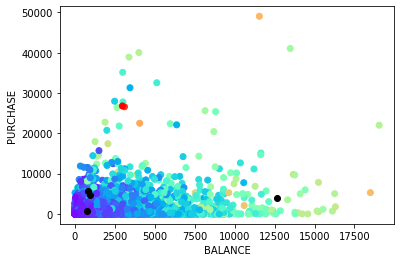

In [20]:
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['CREDIT_LIMIT'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASE')

Text(0, 0.5, 'PAYMENTS')

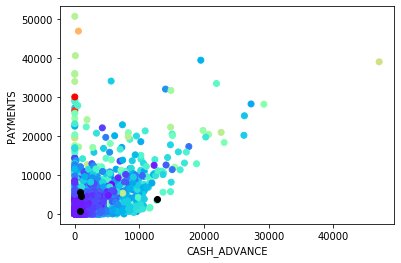

In [21]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['CREDIT_LIMIT'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

In [22]:
df['clusters'] = kmeans.labels_
df.head()

,BALANCE,PURCHASES,CASH_ADVANCE,CREDIT_LIMIT,PAYMENTS,Customer_Size,clusters
0,40.900749,95.40,0.000000,1000.0,201.802084,1,1
1,3202.467416,0.00,6442.945483,7000.0,4103.032597,1,0
2,2495.148862,773.17,0.000000,7500.0,622.066742,1,1
3,1666.670542,1499.00,205.788017,7500.0,0.000000,1,1
4,817.714335,16.00,0.000000,1200.0,678.334763,1,1


Text(0, 0.5, 'PURCHASES')

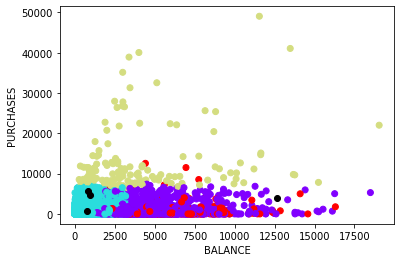

In [23]:
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['clusters'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

Text(0, 0.5, 'PAYMENTS')

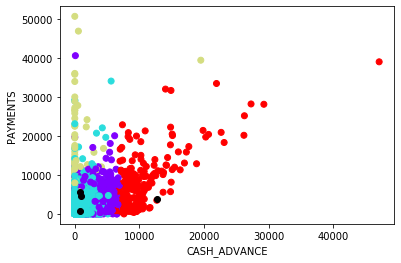

In [24]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['clusters'], cmap='rainbow')

#plot x, y axis coordinates for centroids
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='black')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')

In [25]:
df.columns

Index(['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS',
       'Customer_Size', 'clusters'],
      dtype='object')

In [26]:
#new  data point
#BALANCE=, PURCHASES=, CASH_ADVANCE=, PAYMENTS=

point = [2500, 700, 6000, 622]

#predict category of new data point
#model thinks new data point belongs to setosa cluster (1)
print(kmeans.predict([point]))

[0]


Text(0, 0.5, 'PURCHASES')

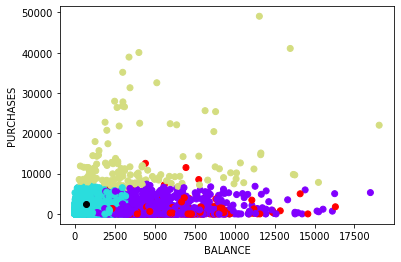

In [27]:
plt.scatter(df['BALANCE'], df['PURCHASES'], c=df['clusters'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(point[1],point[0],c='black')

plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')

Text(0, 0.5, 'PAYMENTS')

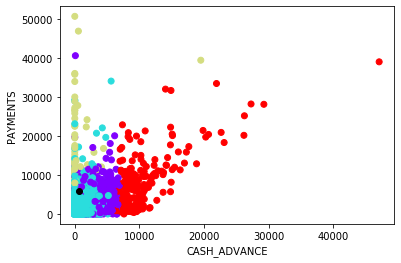

In [28]:
plt.scatter(df['CASH_ADVANCE'], df['PAYMENTS'], c=df['clusters'], cmap= 'rainbow')

#new data point is the black dot
plt.scatter(point[3],point[2],c='black')

plt.xlabel('CASH_ADVANCE')
plt.ylabel('PAYMENTS')